In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

Life Expectancy: Project examines changes in life exectancy over the data timeframe and reviews certain contributing factors.


In [2]:
life_expectancy_path = "life_expectancy.csv"

life_expectancy_data = pd.read_csv(life_expectancy_path)

life_expectancy_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
style_dict = {
    "Mean": "{:.2f}", 
    "Median": "{:.2f}",
    "Variance": "{:.2f}", 
    "Standard Deviation": "{:.2f}",
    "Standard Error": "{:.2f}", 
    "mean": "{:.2f}",
    "median": "{:.2f}",
    "var": "{:.2f}",
    "std": "{:.2f}",
    "sem":"{:.2f}",
    'GDP': "{:.3f}",
    "percentage expenditure": "{:.2f}",
}

In [4]:
life_exp_df = life_expectancy_data.copy()

In [5]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
len(life_exp_df["Country"].unique())

# 193 Countries

193

In [7]:
reduced_df = life_exp_df[['Country', 'Year', 'Status', 'Life expectancy ',
       'Alcohol', ' BMI ', 'Total expenditure','GDP', 'Population',
       'Income composition of resources', 'Schooling']].copy()

reduced_df.columns = [col.strip() for col in reduced_df.columns]

#reduced_df

In [49]:
pd.set_option('display.max_rows', None)
#reduced_df['Country'].value_counts()

In [9]:
drop_countries = ['San Marino', 'Marshall Islands', 'Cook Islands', 'Saint Kitts and Nevis', 'Niue', 'Palau', 'Dominica', 'Monaco', 'Nauru',
                  'Tuvalu']

for country in drop_countries:
    reduced_df.drop(reduced_df[reduced_df['Country'] == country].index, inplace=True)
    
#reduced_df['Country'].value_counts() #all 16
#183 countries

## Dropped 10 Countries - missing life expectancy data
#### San Marino, Marshall Islands, Cook Islands, Saint Kitts and Nevis, Niue, Palau, Dominica, Monaco, Nauru, Tuvalu

In [50]:
reduced_df.groupby("Country")['Schooling'].count()
#183 countries

In [52]:
school_df = reduced_df[['Country', 'Year','Status','Life expectancy','BMI', 'GDP', 'Schooling']].copy()
#school_df

In [53]:
drop_countries_schooling = ['Czechia',"Côte d'Ivoire","Democratic People's Republic of Korea", 
                            "Democratic Republic of the Congo", "Republic of Korea", "Republic of Moldova", "Somalia",
                            "United Kingdom of Great Britain and Northern Ireland","United Republic of Tanzania",
                            "United States of America"]

for country in drop_countries_schooling:
    school_df.drop(school_df[school_df['Country'] == country].index, inplace=True)

In [14]:
school_df.groupby("Country")['Schooling'].count()
#173 countries

Country
Afghanistan                                  16
Albania                                      16
Algeria                                      16
Angola                                       16
Antigua and Barbuda                          16
Argentina                                    16
Armenia                                      16
Australia                                    16
Austria                                      16
Azerbaijan                                   16
Bahamas                                      16
Bahrain                                      16
Bangladesh                                   16
Barbados                                     16
Belarus                                      16
Belgium                                      16
Belize                                       16
Benin                                        16
Bhutan                                       16
Bolivia (Plurinational State of)             16
Bosnia and Herzegovina          

## "Fig. #: Does More School = More Life?"

The correlation between average years in school and average life expectancy is 0.79


Text(0.5, 1.0, 'Fig. 1: Does More School = More Life?')

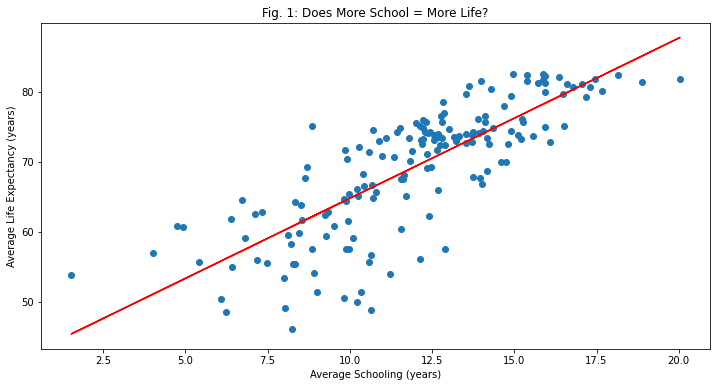

In [15]:
fig = plt.figure(figsize =(12, 6))

school_mean = school_df.groupby("Country")["Schooling"].mean()
school_mean

life_exp_mean = school_df.groupby("Country")["Life expectancy"].mean()
life_exp_mean

correlation_school_life = st.pearsonr(life_exp_mean,school_mean)
print(f"The correlation between average years in school and average life expectancy is {round(correlation_school_life[0],2)}")


x_values = school_mean
y_values = life_exp_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel("Average Schooling (years)")
plt.ylabel("Average Life Expectancy (years)")
plt.title("Fig. 1: Does More School = More Life?")

## "Fig. #: Does More Development = More School?"

<AxesSubplot:>

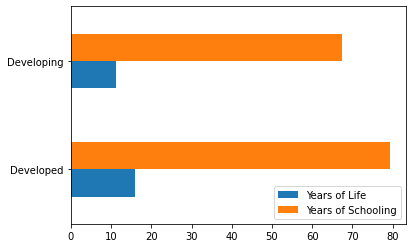

In [16]:
#Split Data into Developed and Developing 

school_dev = school_df.loc[school_df["Status"] == "Developed"]
len(school_dev.groupby("Country"))

#29 Developed countries

In [ ]:
school_undev = school_df.loc[school_df["Status"] == "Developing"]
len(school_undev.groupby("Country"))

#144 Developing countries

In [ ]:
fig2 = plt.figure(figsize =(12, 6))

school_dev_mean = school_dev.groupby("Country")["Schooling"].mean()
school_dev_mean

life_dev_mean = school_dev.groupby("Country")["Life expectancy"].mean()
life_dev_mean

correlation_school_dev_life = st.pearsonr(life_dev_mean,school_dev_mean)
print(f"The correlation between average years in school and average life expectancy in developed countries is {round(correlation_school_dev_life[0],2)}")


x_values = school_dev_mean
y_values = life_dev_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel("Average Schooling (years)")
plt.ylabel("Average Life Expectancy (years old)")
plt.title("Fig. 2: Does More School = More Life in Developed Countries")

# Save the plotted figures as .pngs
fig2.get_figure()
fig2.savefig(r'More_School_Fig2.png')

In [ ]:
fig3 = plt.figure(figsize =(12, 6))

school_undev_mean = school_undev.groupby("Country")["Schooling"].mean()
school_undev_mean

life_undev_mean = school_undev.groupby("Country")["Life expectancy"].mean()
life_undev_mean

correlation_school_undev_life = st.pearsonr(life_undev_mean,school_undev_mean)
print(f"The correlation between average years in school and average life expectancy is {round(correlation_school_undev_life[0],2)}")


x_values = school_undev_mean
y_values = life_undev_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel("Average Schooling (years)")
plt.ylabel("Average Life Expectancy (years old)")
plt.title("Fig. 3: Does More School = More Life in Developing Countries")

# Save PNG
fig3.get_figure()
fig3.savefig(r'More_School_Fig3.png')

In [17]:
## "Fig. #: Does More Alcohol = More Money flowing?"

In [18]:
alc_df = reduced_df
alc_df = alc_df.loc[alc_df['Country'] != "Sudan"]
# Sorting out to see .01 values and then sorting by mean
# Run this to get a summary table
# alc_df.groupby("Country")['Alcohol'].describe().sort_values('min')


# Drop all the countries with .01 as a minimum value, interpreting that value as bad data (but WHO knows?!)
alc_sum_table = alc_df.groupby("Country")['Alcohol'].describe().sort_values('min')
alc_sum_table.drop(alc_sum_table.loc[alc_sum_table['min'] == .01].index, inplace=True)
alc_sum_table = alc_sum_table.merge(alc_df.groupby("Country")['Status'].agg('min'), left_on='Country', right_index=True)
# len(alc_sum_table) = 95
# alc_sum_table['min'].agg('median') = 5.11


# Setting up the tables to aggregate!
gdp_mean = alc_df.groupby("Country")['GDP'].agg('mean')
gdp_mean = pd.DataFrame(gdp_mean)

# Get the Upper and Lower Countries
alc_sum_table = alc_sum_table.merge(gdp_mean, left_on="Country", right_index=True)
alc_sum_table = alc_sum_table.merge(alc_df.groupby('Country')['Life expectancy'].agg('mean'), on='Country')
alc_sum_table = alc_sum_table.merge(alc_df.groupby('Country')['BMI'].agg('mean'), on='Country')
alc_sum_table = alc_sum_table.merge(alc_df.groupby('Country')['Schooling'].agg('mean'), on='Country')

In [19]:
# Do these last, these are copies of the alc sum table grouped by Status
devd_alc_sum_table = alc_sum_table.loc[alc_sum_table['Status'] == 'Developed']
deving_alc_sum_table = alc_sum_table.loc[alc_sum_table['Status'] == 'Developing']
alc_sum_table

# run for any null values? Wait to run this
# drop_em = drop_em.dropna(axis='index', how='any')

,count,mean,std,min,25%,50%,75%,max,Status,GDP,Life expectancy,BMI,Schooling
Country,,,,,,,,,,,,,
Indonesia,15.0,0.068667,0.013558,0.05,0.0600,0.060,0.0800,0.09,Developing,1669.116783,67.55625,19.95625,11.61250
Saudi Arabia,15.0,0.074667,0.019952,0.05,0.0500,0.090,0.0900,0.10,Developing,10689.052946,73.46875,55.31250,13.28750
Egypt,15.0,0.188667,0.035429,0.14,0.1550,0.210,0.2150,0.24,Developing,NaN,71.50000,49.26250,11.89375
Senegal,15.0,0.309333,0.032834,0.26,0.2800,0.320,0.3350,0.36,Developing,274.611166,62.56875,18.44375,7.12500
Djibouti,15.0,0.764000,0.349873,0.38,0.4700,0.530,1.0250,1.34,Developing,897.999871,60.75625,26.25000,4.75000
Oman,15.0,0.534667,0.070596,0.38,0.5250,0.560,0.5700,0.63,Developing,7621.311127,74.84375,44.78125,12.22500
Jordan,15.0,0.517333,0.073140,0.40,0.4600,0.540,0.5700,0.61,Developing,1822.629926,72.98750,53.00000,13.23750
Malaysia,15.0,0.490667,0.036736,0.42,0.4700,0.490,0.5250,0.54,Developing,4904.938992,73.75625,29.16875,12.56250
Morocco,15.0,0.518667,0.060340,0.43,0.4600,0.540,0.5600,0.62,Developing,1936.391438,72.15625,48.61875,10.28750


In [20]:
# Do these last, these are copies of the alc sum table grouped by Status
devd_alc_sum_table = alc_sum_table.loc[alc_sum_table['Status'] == 'Developed']
deving_alc_sum_table = alc_sum_table.loc[alc_sum_table['Status'] == 'Developing']
alc_sum_table

# run for any null values? Wait to run this
# drop_em = drop_em.dropna(axis='index', how='any')

,count,mean,std,min,25%,50%,75%,max,Status,GDP,Life expectancy,BMI,Schooling
Country,,,,,,,,,,,,,
Indonesia,15.0,0.068667,0.013558,0.05,0.0600,0.060,0.0800,0.09,Developing,1669.116783,67.55625,19.95625,11.61250
Saudi Arabia,15.0,0.074667,0.019952,0.05,0.0500,0.090,0.0900,0.10,Developing,10689.052946,73.46875,55.31250,13.28750
Egypt,15.0,0.188667,0.035429,0.14,0.1550,0.210,0.2150,0.24,Developing,NaN,71.50000,49.26250,11.89375
Senegal,15.0,0.309333,0.032834,0.26,0.2800,0.320,0.3350,0.36,Developing,274.611166,62.56875,18.44375,7.12500
Djibouti,15.0,0.764000,0.349873,0.38,0.4700,0.530,1.0250,1.34,Developing,897.999871,60.75625,26.25000,4.75000
Oman,15.0,0.534667,0.070596,0.38,0.5250,0.560,0.5700,0.63,Developing,7621.311127,74.84375,44.78125,12.22500
Jordan,15.0,0.517333,0.073140,0.40,0.4600,0.540,0.5700,0.61,Developing,1822.629926,72.98750,53.00000,13.23750
Malaysia,15.0,0.490667,0.036736,0.42,0.4700,0.490,0.5250,0.54,Developing,4904.938992,73.75625,29.16875,12.56250
Morocco,15.0,0.518667,0.060340,0.43,0.4600,0.540,0.5600,0.62,Developing,1936.391438,72.15625,48.61875,10.28750


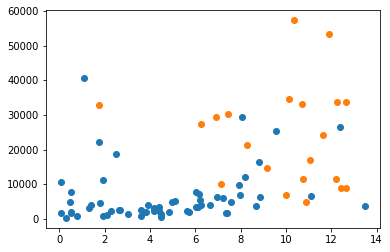

In [21]:
# Alcohol consumption x, GDP y
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,9])
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,9])

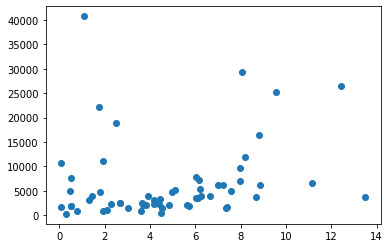

In [22]:
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,9])

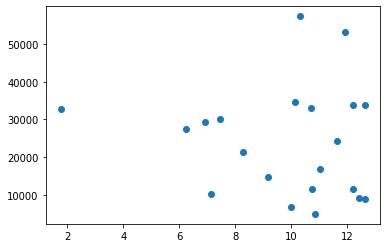

In [23]:
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,9])

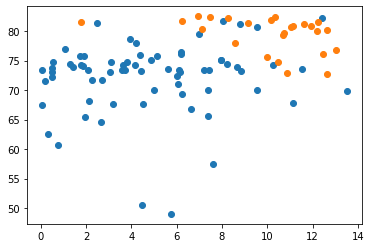

In [24]:
# compared to LE
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,10])
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,10])

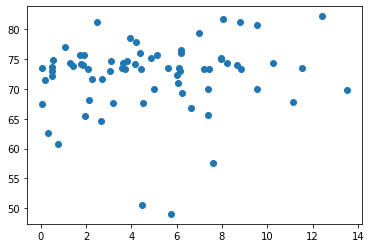

In [25]:
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,10])

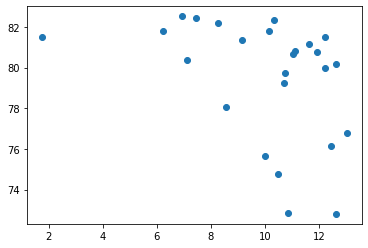

In [26]:
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,10])

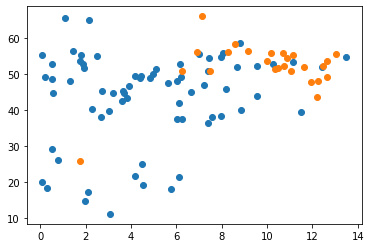

In [27]:
# Compared to BMI
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,11])
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,11])

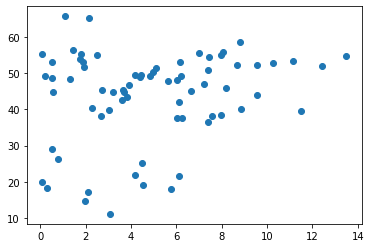

In [28]:
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,11])

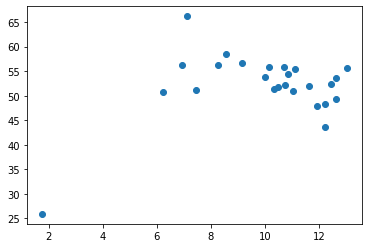

In [29]:
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,11])

# Tom's Code Starts

In [30]:
#Create dataframe to focus on life expectancy data
status_df = reduced_df.groupby(['Year', 'Status'], as_index=False)['Life expectancy'].mean()

year_df = pd.DataFrame(status_df)

year_df

,Year,Status,Life expectancy
0,2000,Developed,76.803125
1,2000,Developing,64.619868
2,2001,Developed,77.128125
3,2001,Developing,65.009934
4,2002,Developed,77.546875
5,2002,Developing,65.190728
6,2003,Developed,77.940625
7,2003,Developing,65.206623
8,2004,Developed,78.384375
9,2004,Developing,65.370861


In [31]:
#Create pivot to plot life expectancy change over the data timeframe
years_df = year_df.pivot_table(index=['Year'], columns=['Status'], values = 'Life expectancy')

years_final_df = pd.DataFrame(years_df)

years_final_df

Status,Developed,Developing
Year,,
2000,76.803125,64.619868
2001,77.128125,65.009934
2002,77.546875,65.190728
2003,77.940625,65.206623
2004,78.384375,65.370861
2005,78.590625,66.009272
2006,79.131250,66.450331
2007,79.300000,66.860927
2008,78.931250,67.413907


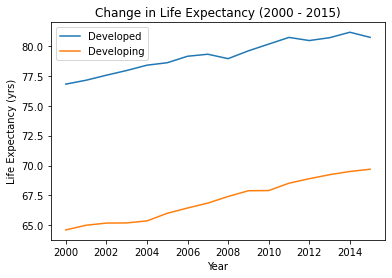

In [32]:
#Create line chart to display life expectancy trend over data years 
plt.plot(years_final_df)
plt.title("Change in Life Expectancy (2000 - 2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (yrs)")
plt.legend(['Developed', 'Developing'], loc="best")

plt.savefig("Life Expectancy Trend.png")

plt.show()

In [33]:
#create dataframe for percent change in life expectancy from year to year
pct_change = years_final_df.pct_change()

pct_change['Developed'] = pct_change['Developed'].fillna(0)
pct_change['Developing'] = pct_change['Developing'].fillna(0)
pct_change['Developed'] = pct_change['Developed'].astype(float) * 100
pct_change['Developing'] = pct_change['Developing'].astype(float) * 100
           
pct_change

Status,Developed,Developing
Year,,
2000,0.000000,0.000000
2001,0.423160,0.603632
2002,0.542928,0.278103
2003,0.507757,0.024381
2004,0.569344,0.251874
2005,0.263126,0.976598
2006,0.687900,0.668178
2007,0.213253,0.617899
2008,-0.465006,0.827060


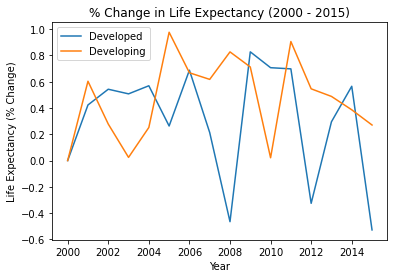

In [34]:
#Create line chart for life expectancy yearly percent change
plt.plot(pct_change)
plt.title("% Change in Life Expectancy (2000 - 2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (% Change)")
plt.legend(['Developed', 'Developing'], loc="best")

plt.savefig("Life Expectancy % Change.png")

plt.show()

In [35]:
pct_cumm_change = pct_change

pct_cumm_change['developed_cum_percent'] = round(pct_cumm_change['Developed'].cumsum(),2)
pct_cumm_change['developing_cum_percent'] = round(pct_cumm_change['Developing'].cumsum(),2)

pct_cumm_change = pct_cumm_change.drop(['Developed', 'Developing'],axis=1)

pct_cumm_change

Status,developed_cum_percent,developing_cum_percent
Year,,
2000,0.00,0.00
2001,0.42,0.60
2002,0.97,0.88
2003,1.47,0.91
2004,2.04,1.16
2005,2.31,2.13
2006,2.99,2.80
2007,3.21,3.42
2008,2.74,4.25


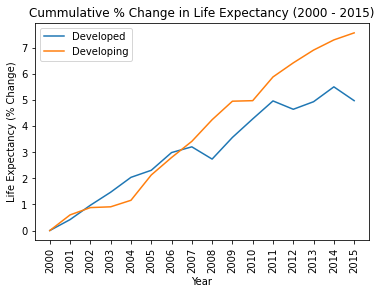

In [36]:
plt.plot(pct_cumm_change)
plt.title("Cummulative % Change in Life Expectancy (2000 - 2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (% Change)")
plt.legend(['Developed', 'Developing'], loc="best")
plt.xticks(list(pct_cumm_change.index), rotation=90)

plt.savefig("Life Expectancy % Cumm Change.png")

plt.show()

Observations: Life Expectancy Trends for Developing and Developed countires (2000 - 2015)

1. As expected, Life Expectancy has increased over the period by roughly 3 years for Developed countries and 5 years for Developing countries. 
2. Although Developed countries have a higher Life Expectancy, Developing countries show a greater increase over the period at 7.8% compared to 5% for Developed countries.
3. There is variation in Life Expectancy with 2008 and 2015 showing decreases in Life Expectancy. Further analysis needs to be done to determine what contributing factors led to the decreases for those 2 years.

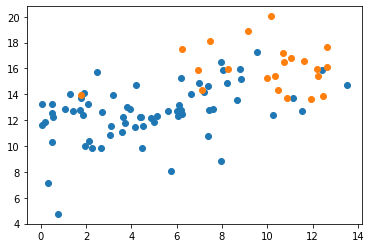

In [37]:
# Compared to BMI
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,12])
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,12])

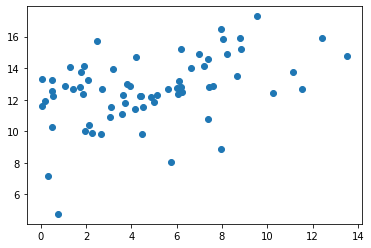

In [38]:
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,12])

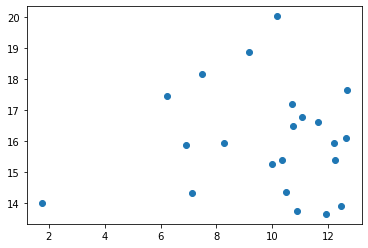

In [39]:
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,12])

# -------------------------------------------------------------------------------------------------------------------

# BMI Hypothesis Data Cleaning/Organizing

In [40]:
#BMItoLife

# bmi_clean_df = reduced_df
bmi_drop_values = ['Sudan', 'South Sudan']

bmi_clean_dfx = reduced_df[reduced_df.Country.isin(bmi_drop_values) == False]

# for country in BMI_drop:
#     bmi_clean_dfx.drop(bmi_clean_dfx[bmi_clean_dfx['Country'] == country].index, inplace=True)

unique_df = bmi_clean_dfx.drop_duplicates("Country")

developed_df = bmi_clean_dfx[bmi_clean_dfx.Status != "Developing"]
developing_df = bmi_clean_dfx[bmi_clean_dfx.Status != "Developed"]

developed = len(unique_df.loc[unique_df["Status"] == "Developed"])
developing = len(unique_df.loc[unique_df["Status"] == "Developing"])

bmi_df = bmi_clean_dfx.groupby("Country").mean()
bmi_dfx = bmi_clean_dfx.groupby("Status").mean()
developed_data = developed_df.groupby("Country").mean()
developing_data = developing_df.groupby("Country").mean()

# PieChart for Country Status

Text(0.5, 1.0, 'Country Status')

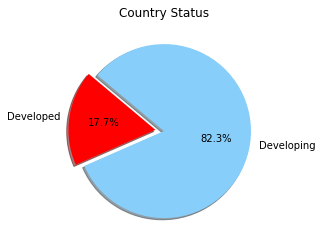

In [41]:
labels = ["Developed", "Developing"]
sizes = [developed, developing]
colors = ["red", "lightskyblue"]
explode = (0.1, 0)

py_pie = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title ("Country Status")

# Bar Chart for Average BMI by Country Status

Text(0, 0.5, 'Average BMI')

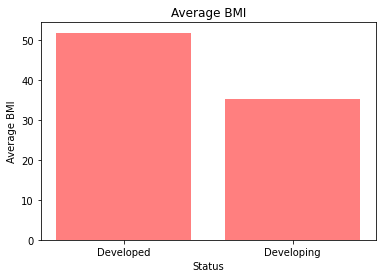

In [42]:
x_axis = ["Developed", "Developing"]
count = bmi_dfx["BMI"]

plt.bar(x_axis, count, color='r', alpha=0.50, align="center")
# plt.xticks(rotation=90)
plt.title("Average BMI")
plt.xlabel("Status")
plt.ylabel("Average BMI")

# Scatter Plot for BMI and Life Expectancy for Developed Countries

Text(0.5, 1.0, 'BMI Impact on Life Expectancy (Developed Nations)')

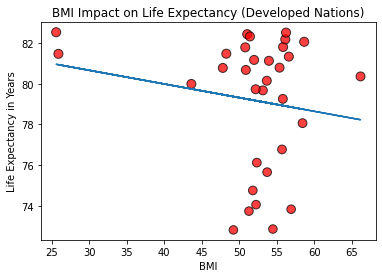

In [43]:
bmi = developed_data["BMI"]
life = developed_data["Life expectancy"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(bmi, life)
py_fit = py_slope * bmi + py_int
plt.plot(bmi,py_fit,"-")

plt.scatter(bmi, life, marker="o", facecolors="red", edgecolors="black",
               s=life, alpha=0.75)
plt.xlabel("BMI")
plt.ylabel("Life Expectancy in Years")
plt.title("BMI Impact on Life Expectancy (Developed Nations)")

# Scatter Plot for BMI and Life Expectancy for Developing Countries

Text(0.5, 1.0, 'BMI Impact on Life Expectancy (Developing Nations)')

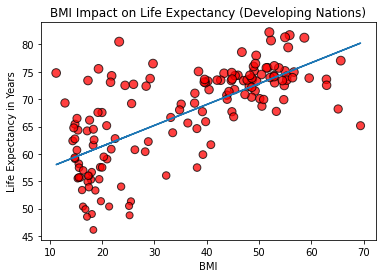

In [44]:
bmix = developing_data["BMI"]
lifex = developing_data["Life expectancy"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(bmix, lifex)
py_fit = py_slope * bmix + py_int
plt.plot(bmix,py_fit,"-")

plt.scatter(bmix, lifex, marker="o", facecolors="red", edgecolors="black",
               s=lifex, alpha=0.75)
plt.xlabel("BMI")
plt.ylabel("Life Expectancy in Years")
plt.title("BMI Impact on Life Expectancy (Developing Nations)")

# Summary Statistics for BMI

In [45]:
cor = round(st.pearsonr(life, bmi)[0],2)
corx = round(st.pearsonr(lifex, bmix)[0],2)

In [46]:
developed_df.describe()

,Year,Life expectancy,Alcohol,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
count,512.000000,512.000000,484.000000,512.000000,480.000000,448.000000,4.160000e+02,464.000000,464.000000
mean,2007.500000,79.197852,9.826736,51.803906,7.554042,22053.386446,6.830053e+06,0.852489,15.845474
std,4.614281,3.930942,2.765858,17.196829,2.984389,22870.827763,1.479524e+07,0.052843,1.766799
min,2000.000000,69.900000,0.010000,3.200000,1.100000,12.277330,1.230000e+02,0.703000,11.500000
25%,2003.750000,76.800000,8.617500,53.775000,6.407500,3875.740910,1.993282e+05,0.815000,14.700000
50%,2007.500000,79.250000,10.320000,57.450000,7.895000,13560.723860,1.167660e+06,0.862000,15.800000
75%,2011.250000,81.700000,11.697500,61.300000,9.212500,36760.425993,5.759450e+06,0.894000,16.800000
max,2015.000000,89.000000,15.190000,69.600000,17.600000,119172.741800,8.253418e+07,0.948000,20.700000


# Extra BMI Code

In [47]:
# bmi = bmi_df["BMI"]
# life = bmi_df["Life expectancy"]

# py_slope, py_int, py_r, py_p, py_std_err = st.linregress(bmi, life)
# py_fit = py_slope * bmi + py_int
# plt.plot(bmi,py_fit,"-")

# plt.scatter(bmi, life, marker="o", facecolors="red", edgecolors="black",
#               s=life, alpha=0.75)
# plt.xlabel("BMI")
# plt.ylabel("Life Expectancy in Years")
# plt.title("BMI Impact on Life Expectancy")

In [48]:
# # # bmi = bmi_df["BMI"]
# # # life = bmi_df["Life expectancy"]

# py_slope, py_int, py_r, py_p, py_std_err = st.linregress(life, bmi)
# py_fit = py_slope * life + py_int
# plt.plot(life,py_fit,"-")

# plt.scatter(life, bmi, marker="o", facecolors="red", edgecolors="black",
#               s=bmi, alpha=0.75)
# plt.xlabel("Life Expectancy in Years")
# plt.ylabel("BMI")
# plt.title("BMI Impact on Life Expectancy")